# LAB 7
# PDE

## Question 8

### Alternating Direction Implicit(ADI) Scheme

Parabolic PDE of 2 variables, 

$$\frac{\partial u}{\partial x} = \triangledown^2 u$$

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$Initial Condition: 
$$u(x,y,0) = \cos{( \frac{\pi x}{2})}\cos{(\frac{\pi y}{2})}$$

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$Boundary Condition:
$$u = 0\qquad , \qquad when x = \pm 1 $$
$$u = 0 \qquad , \qquad when y = \pm 1$$

$$\delta t = \frac{1}{24}, \;\;\; \text{Experiment with different}\; \delta x.$$

In [2]:
import numpy as np
import pandas as pd

In [3]:
x1 = -1
x2 = 1

In [55]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]


def main_(dx=0.5):
    dt = 1/24
    r = dt/(dx*dx)
    n = int((x2-x1)/dx)
    #print(n)
    
    xy = np.zeros((n+1,n+1,2))    
    u_xy = np.zeros((n+1,n+1))
    u_xy_1by2 = np.zeros((n+1,n+1))
    
    for i in range(n+1):
        for j in range(n+1):
            xy[i][j][0] = x1+i*dx
            xy[i][j][1] = x1+j*dx
            u_xy[i][j] = np.cos(np.pi*xy[i][j][0]/2) * np.cos(np.pi*xy[i][j][1]/2)
    
    print("Value of r = ", r)

    flag=10
    #print(xy)
    #print(u_xy)
    while flag!=0:
    
        a = np.zeros(n-1)
        b = np.zeros(n-1)
        c = np.zeros(n-1)
        d = np.zeros(n-1)
        
        #print(u_j_n)
        #print(-1 * u_j_n[1] - (r/2)*(u_j_n[2]-2*u_j_n[1]+u_j_n[0]))

        for j in range(n-1):
            for i in range(n-1):
                a[i] = r/2
                b[i] = -1 * (r+1)
                c[i] = r/2
                d[i] = (-1*r*u_xy[i+1][j])/2 + (r-1)*u_xy[i+1][j+1] - (r*u_xy[i+1][j+2])/2

            #print(d)

            a[0] = 0
            c[-1] = 0

            c_, d_ = thomas_(a,b,c,d)
            res1 = np.zeros(n-1)

            res1[-1] = d_[-1]
            for i in range(n-2):
                res1[n-3-i] = d_[n-3-i] - res1[n-2-i]*c_[n-3-i]

            res = np.zeros(n+1)
            for i in range(n-1):
                res[i+1] = res1[i]

            u_xy_1by2[:,j+1] = res
            
        for i in range(n-1):
            for j in range(n-1):
                a[j] = r/2
                b[j] = -1 * (r+1)
                c[j] = r/2
                d[j] = (-1*r*u_xy_1by2[i][j+1])/2 + (r-1)*u_xy_1by2[i+1][j+1] - (r*u_xy_1by2[i+2][j+1])/2
                
            a[0] = 0
            c[-1] = 0
            
            c_, d_ = thomas_(a,b,c,d)
            res1 = np.zeros(n-1)

            res1[-1] = d_[-1]
            for i in range(n-2):
                res1[n-3-i] = d_[n-3-i] - res1[n-2-i]*c_[n-3-i]

            res = np.zeros(n+1)
            for i in range(n-1):
                res[i+1] = res1[i]

            u_xy[:,j+1] = res
                
            
        flag = flag-1
        
    return [u_xy, xy]

In [56]:
a_1, x_1 = main_(0.5)
a_2, x_2 = main_(0.2)
a_3, x_3 = main_(0.1)
a_4, x_4 = main_(0.01)

Value of r =  0.16666666666666666
Value of r =  1.0416666666666663
Value of r =  4.166666666666665
Value of r =  416.66666666666663


In [57]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(a_1)

[[0.000 0.000 0.000 0.000 0.000]
 [0.000 0.500 0.707 0.410 0.000]
 [0.000 0.707 1.000 0.560 0.000]
 [0.000 0.500 0.707 0.286 0.000]
 [0.000 0.000 0.000 0.000 0.000]]


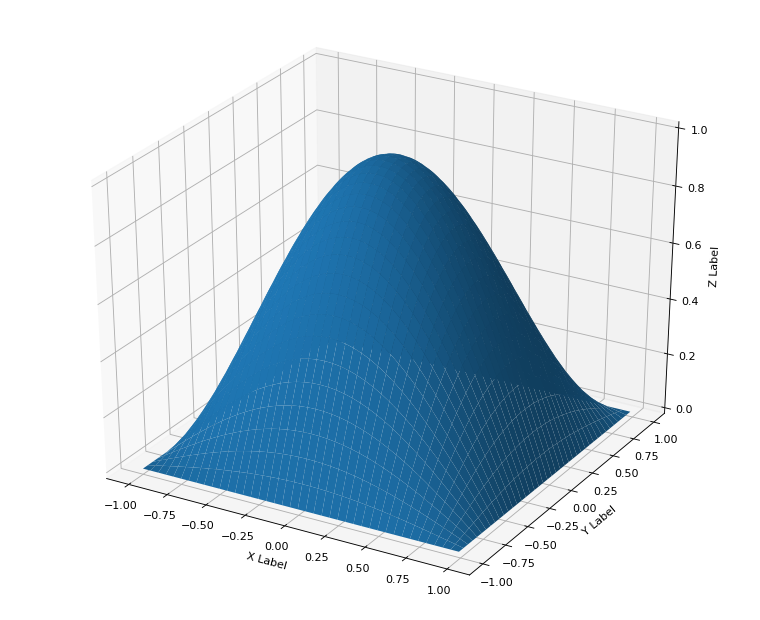

In [59]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-1.0, 1.0, 2/a_4.shape[1])
X, Y = np.meshgrid(x, y)
Z = a_4
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()